# **Классическая задача классификации изображений - 🐱🐶 Классификации**

## **Данные из открытых датасетов**
[Open dataset cats and dogs from the Kaggle platform](https://www.kaggle.com/datasets/tongpython/cat-and-dog/data)

***Импорт необходимых библиотек для данной работы***

In [ ]:
import os
import time
from datetime import datetime
import json
import requests
from selenium import webdriver

import random
import numpy as np
import pandas as pd
import urllib.parse
from glob import glob
from bs4 import BeautifulSoup

import cv2
import seaborn as sns
from PIL import Image
import matplotlib.pylab as plt
from collections import Counter

***Загрузить все изображения из обучающего набора***

In [ ]:
# 指定图片文件夹路径
train_set_path = r'C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\train_set'

# 使用glob模块获取文件夹中所有图片的文件路径
train_image_files = glob(f'{train_set_path}/*.jpg')  # 可根据实际图片格式进行修改

# 创建一个空的列表，用于存储所有读取的图片
train_images = []

# 循环遍历图片文件路径，并使用OpenCV读取图片
for train_image_file in train_image_files:
    # 读取图片
    train_img = cv2.imread(train_image_file)

    # 将图片添加到列表中
    train_images.append(train_img)

***Загрузить все изображения из тестового набора***

In [ ]:
# 指定图片文件夹路径
test_set_path = r'C:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\test_set'

# 使用glob模块获取文件夹中所有图片的文件路径
test_image_files = glob(f'{test_set_path}/*.jpg')  # 可根据实际图片格式进行修改

# 创建一个空的列表，用于存储所有读取的图片
test_images = []

# 循环遍历图片文件路径，并使用OpenCV读取图片
for test_image_file in test_image_files:
    # 读取图片
    test_img = cv2.imread(test_image_file)

    # 将图片添加到列表中
    test_images.append(test_img)

In [ ]:
print('Всего в обучающем наборе', [len(train_images)], 'изображений')
print('Всего в тестовом наборе', [len(test_images)], 'изображения')

Всего в обучающем наборе [8005] изображений
Всего в тестовом наборе [2023] изображения


***Получается, что в нашем обучающем наборе всего 8005 изображений, а в тестовом наборе всего 2023 изображения.***

## **Веб-скрейпинг**

### **[Web-scraping — dogs](https://pixnio.com/ru/%25D1%2584%25D0%25BE%25D1%2582%25D0%25BE/%D0%B6%D0%B8%D0%B2%D0%BE%D1%82%D0%BD%D1%8B%D1%85/%D1%81%D0%BE%D0%B1%D0%B0%D0%BA%D0%B8)**

In [ ]:
# 目标网页的URL
base_url = "https://pixnio.com/ru/%25D1%2584%25D0%25BE%25D1%2582%25D0%25BE/%D0%B6%D0%B8%D0%B2%D0%BE%D1%82%D0%BD%D1%8B%D1%85/%D1%81%D0%BE%D0%B1%D0%B0%D0%BA%D0%B8"
page_count = 10

# 创建目录保存图片
if not os.path.exists("scraped_image_set"):
    os.makedirs("scraped_image_set")

# 初始化图片计数器
total_images = 0

# 循环处理每一页
for page in range(1, page_count + 1):
    # 构建当前页的URL
    page_url = f"{base_url}/page/{page}"

    # 发送GET请求获取网页内容
    response = requests.get(page_url)
    html_content = response.content

    # 使用Beautiful Soup解析网页内容
    soup = BeautifulSoup(html_content, "html.parser")

    # 提取图片链接，跳过第一个图片（网站logo）
    image_links = []
    for img_tag in soup.find_all("img")[1:]:
        if "src" in img_tag.attrs:
            image_links.append(img_tag["src"])

    # 下载图片
    for i, image_link in enumerate(image_links):
        image_data = requests.get(image_link).content

        with open(f"scraped_image_set/page_{page}_image_{i+1}.jpg", "wb") as f:
            f.write(image_data)

    print(f"第 {page} 页图片下载完成")

print(f"所有图片下载完成，共爬取 {total_images} 张图片")

第 1 页图片下载完成
第 2 页图片下载完成
第 3 页图片下载完成
第 4 页图片下载完成
第 5 页图片下载完成
第 6 页图片下载完成
第 7 页图片下载完成
第 8 页图片下载完成
第 9 页图片下载完成
第 10 页图片下载完成
所有图片下载完成，共爬取 260 张图片


***Всего было получено 260 изображений с 10 страниц веб-сайта собак***

### **[Web-scraping — cats](https://pixnio.com/ru/%25D1%2582%25D0%25B5%25D0%25B3/%D0%BA%D0%BE%D1%88%D0%BA%D0%B0)**

In [ ]:
# 目标网页的URL
base_url = "https://pixnio.com/ru/%25D1%2582%25D0%25B5%25D0%25B3/%D0%BA%D0%BE%D1%88%D0%BA%D0%B0"
start_page = 11
page_count = 10

# 创建目录保存图片
if not os.path.exists("scraped_image_set"):
    os.makedirs("scraped_image_set")

# 初始化图片计数器
total_images = 0

# 循环处理每一页
for page in range(start_page, start_page + page_count):
    # 构建当前页的URL
    page_url = f"{base_url}/page/{page}"

    # 发送GET请求获取网页内容
    response = requests.get(page_url)
    #print('状态码:{}'.format(response.status_code))
    html_content = response.content

    # 使用Beautiful Soup解析网页内容
    soup = BeautifulSoup(html_content, "html.parser")

    # 提取图片链接，跳过第一个图片（网站logo）
    image_links = []
    for img_tag in soup.find_all("img")[1:]:
        if "src" in img_tag.attrs:
            image_links.append(img_tag["src"])

    # 下载图片
    for i, image_link in enumerate(image_links):
        image_data = requests.get(image_link).content

        with open(f"scraped_image_set/page_{page}_image_{i+1}.jpg", "wb") as f:
            f.write(image_data)

    print(f"第 {page} 页图片下载完成")

print(f"所有图片下载完成，共爬取 {total_images} 张图片")

第 11 页图片下载完成
第 12 页图片下载完成
第 13 页图片下载完成
第 14 页图片下载完成
第 15 页图片下载完成
第 16 页图片下载完成
第 17 页图片下载完成
第 18 页图片下载完成
第 19 页图片下载完成
第 20 页图片下载完成
所有图片下载完成，共爬取 360 张图片


***Всего было получено 360 изображений с 10 страниц веб-сайта кошек***

***Получается, что на этом веб-скрейпинг мы всего собрали 620 изображений и сохраняем их в одной папке.***

## **Создание единого датасета**

***Давайте сначала подсчитаем количество изображений, содержащихся в существующих 3 наборах изображений "train_set", "test_set" и "scraped_image_set"***

In [ ]:
# 文件夹列表
directories = ["train_set", "test_set", "scraped_image_set"]

# 初始化总图片计数器
total_image_count = 0

# 遍历每个文件夹并统计图片数量
for directory in directories:
    directory_path = os.path.join(os.getcwd(), directory)
    image_count = sum(1 for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file)))
    print(f"文件夹 {directory} 中共有 {image_count} 张图片")

    # 累积总图片数量
    total_image_count += image_count

print(f"\n所有文件夹中共有 {total_image_count} 张图片")

文件夹 train_set 中共有 8005 张图片
文件夹 test_set 中共有 2023 张图片
文件夹 scraped_image_set 中共有 620 张图片

所有文件夹中共有 10648 张图片


***Получается, всего 10648 изображений в 3 наборах изображений***

***Давайте агрегируем их и создадим единый датасет***

In [ ]:
# 数据集文件夹列表
dataset_folders = ["train_set", "test_set", "scraped_image_set"]

# 初始化总数据集
dataset = []

# 遍历每个数据集文件夹
for folder in dataset_folders:
    folder_path = os.path.join(os.getcwd(), folder)

    # 遍历文件夹中的图片文件
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # 获取标签
        if "cat" in filename:
            label = "cat"
        elif "dog" in filename:
            label = "dog"
        else:
            label = "NaN"

        # 添加其他基本信息（例如宽度、高度和图像的颜色统计信息等）
        with Image.open(file_path) as img:
            width, height = img.size
            format_type = img.format

        # 添加到总数据集
        dataset.append({
            "file_path": file_path,
            "label": label,
            "width": width,
            "height": height,
            "format_type": format_type,
            })

# 保存合并后的数据集到 JSON 文件
output_json_path = "dataset_org.json"
with open(output_json_path, "w") as json_file:
    json.dump(dataset, json_file, indent=4)

print(f"合并后的数据集已保存到 {output_json_path}")

合并后的数据集已保存到 dataset_org.json


***Теперь все полученные изображения сохраняются в файле .json с именем dataset_org.***

## **EDA**

***Давайте сделаем простой EDA для агрегированного набора данных изображений***

Основная информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10648 entries, 0 to 10647
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   file_path    10648 non-null  object
 1   label        10648 non-null  object
 2   width        10648 non-null  int64 
 3   height       10648 non-null  int64 
 4   format_type  10648 non-null  object
dtypes: int64(2), object(3)
memory usage: 416.1+ KB
None

Первые 5 строк набора данных:
                                           file_path label  width  height  \
0  c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\trai...   cat    300     280   
1  c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\trai...   cat    489     499   
2  c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\trai...   cat    403     499   
3  c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\trai...   cat    150     149   
4  c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\trai...   cat    336     499   

  format_type  
0

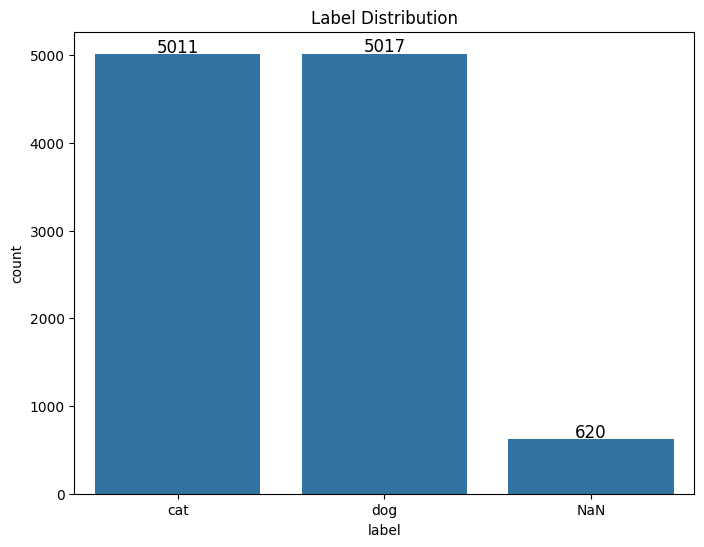

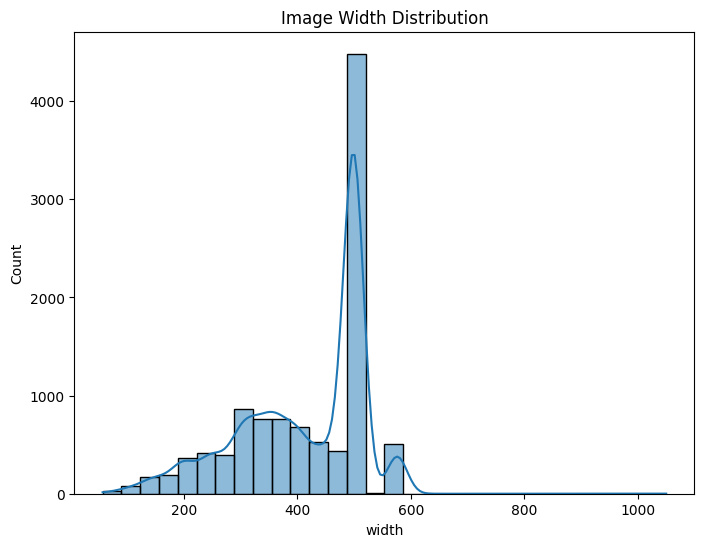

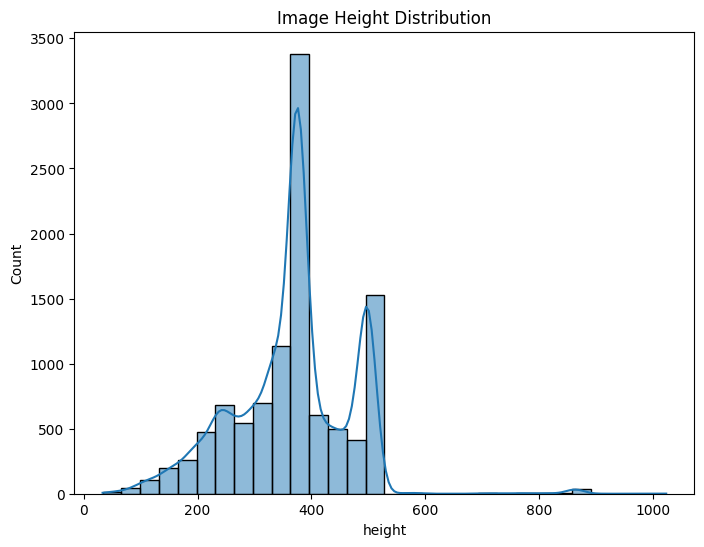

In [ ]:
# 读取 JSON 文件
with open("dataset_org.json", "r") as json_file:
    data = json.load(json_file)

# 将 JSON 转换为 DataFrame
df = pd.DataFrame(data)

# 打印数据集的基本信息
print("Основная информация о наборе данных:")
print(df.info())

# 打印数据集的前几行
print("\nПервые 5 строк набора данных:")
print(df.head())

# 绘制标签分布的条形图
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="label", data=df)
plt.title("Label Distribution")
# 添加数字标签
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

# 绘制图像宽度分布的直方图
plt.figure(figsize=(8, 6))
sns.histplot(df["width"], bins=30, kde=True)
plt.title("Image Width Distribution")
plt.show()

# 绘制图像高度分布的直方图
plt.figure(figsize=(8, 6))
sns.histplot(df["height"], bins=30, kde=True)
plt.title("Image Height Distribution")
plt.show()

***Давайте сохраним еще один csv-файл***

In [ ]:
df.to_csv("dataset_org.csv", index=False)
df

,file_path,label,width,height,format_type
0,c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\trai...,cat,300,280,JPEG
1,c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\trai...,cat,489,499,JPEG
2,c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\trai...,cat,403,499,JPEG
3,c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\trai...,cat,150,149,JPEG
4,c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\trai...,cat,336,499,JPEG
...,...,...,...,...,...
10643,c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\scra...,NaN,508,339,JPEG
10644,c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\scra...,NaN,508,339,JPEG
10645,c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\scra...,NaN,576,384,JPEG
10646,c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\scra...,NaN,576,384,JPEG


In [ ]:
df.label.value_counts()

label
dog    5017
cat    5011
NaN     620
Name: count, dtype: int64

***Как видно, в столбце "label" в общей сложности 620 значений NaN, это соответствует количеству немаркированных изображений, полученных при веб-скрейпинг.***

## **Базовые визуализации для основных признаков с учетом разметки данных**

***Давайте случайным образом выберем 10 изображений из датасета и построим базовую визуализацию для их основных признаков с учетом разметки данных.***

Image Path: c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\train_set\cat.993.jpg
Image Size: (333, 499, 3)
Pixel Value Range: 0 - 255


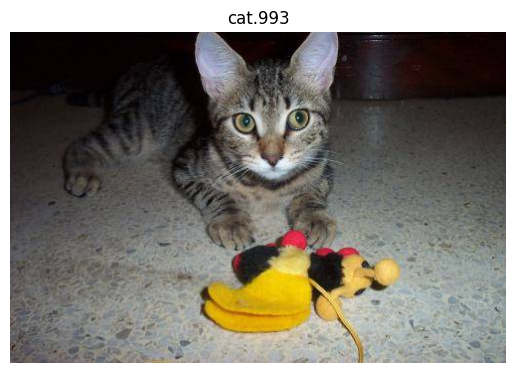

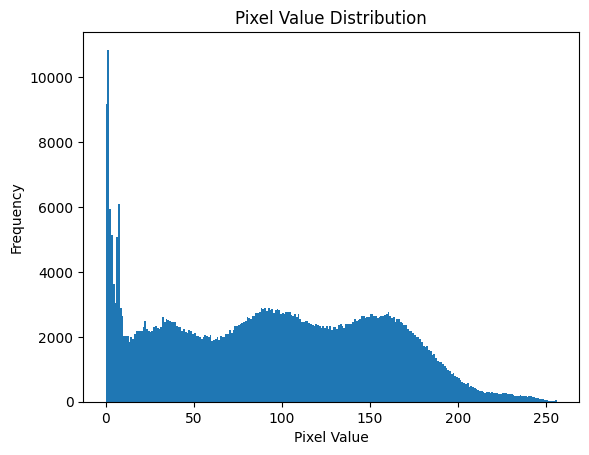

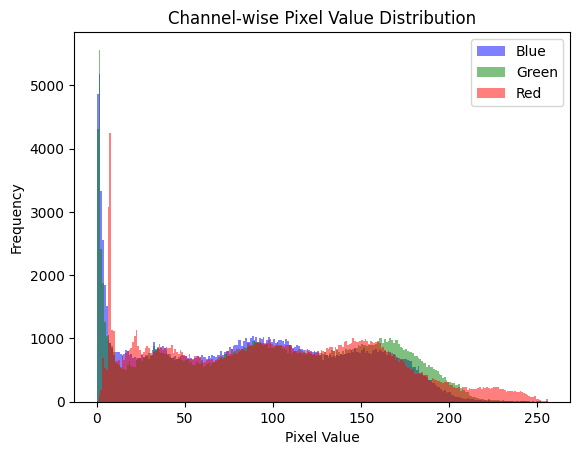

Image Path: c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\train_set\dog.189.jpg
Image Size: (327, 430, 3)
Pixel Value Range: 7 - 255


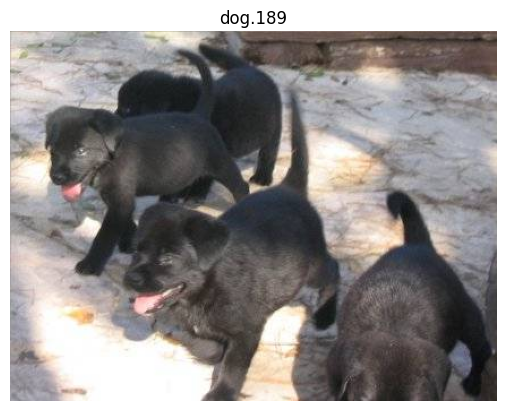

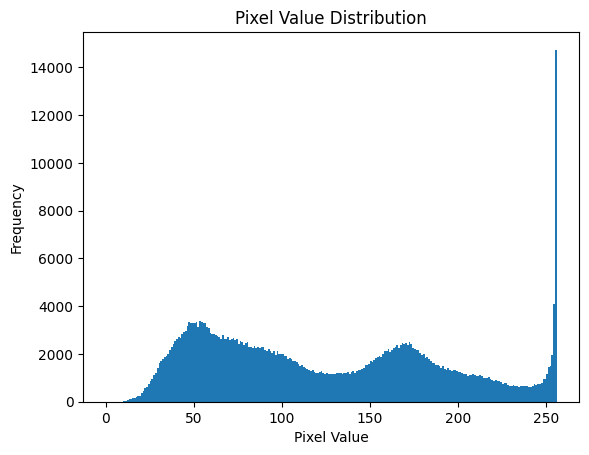

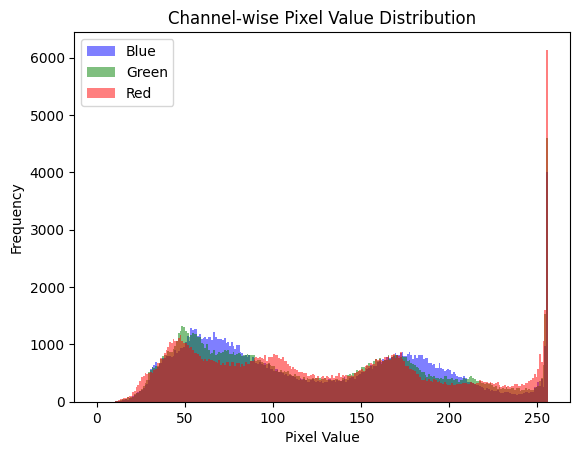

Image Path: c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\train_set\cat.2331.jpg
Image Size: (239, 320, 3)
Pixel Value Range: 0 - 242


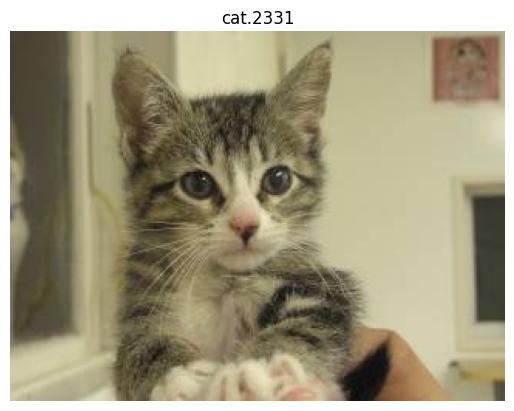

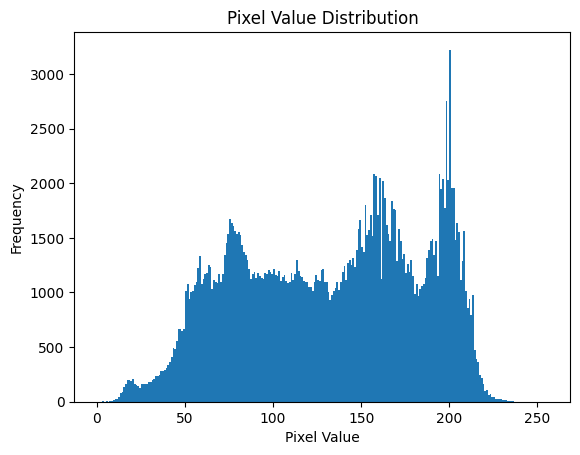

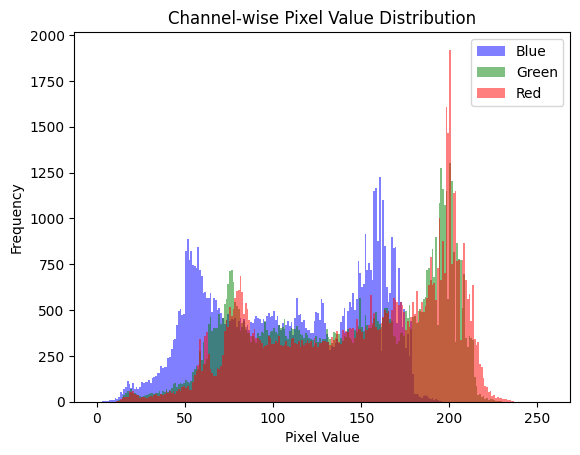

Image Path: c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\train_set\cat.3118.jpg
Image Size: (311, 300, 3)
Pixel Value Range: 3 - 248


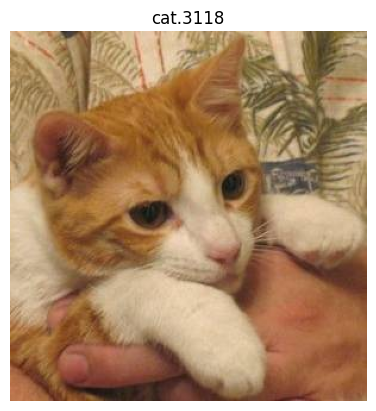

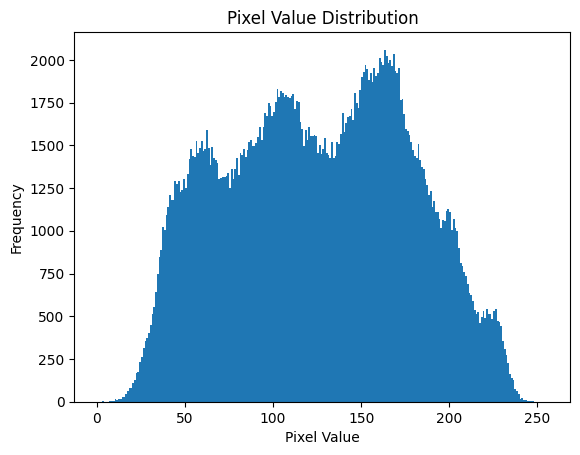

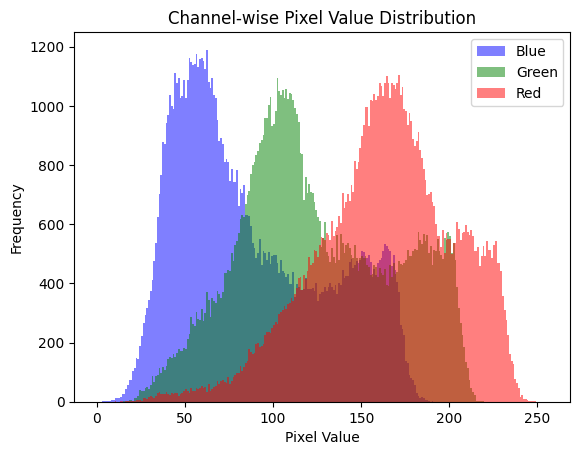

Image Path: c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\train_set\cat.3639.jpg
Image Size: (374, 500, 3)
Pixel Value Range: 0 - 247


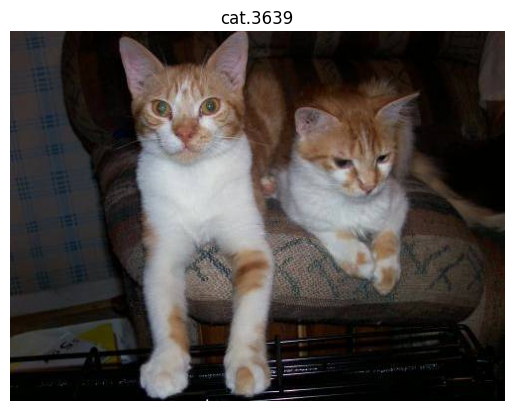

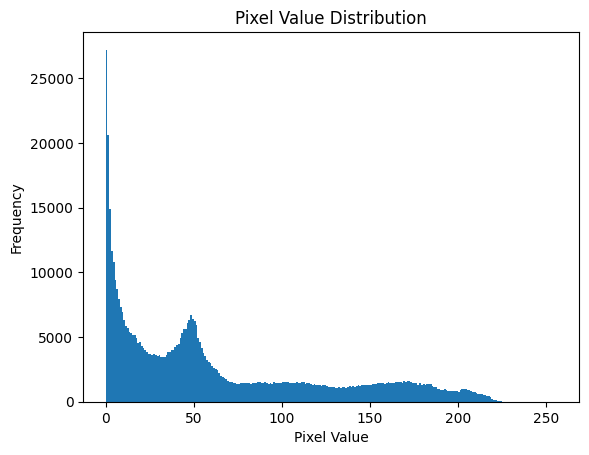

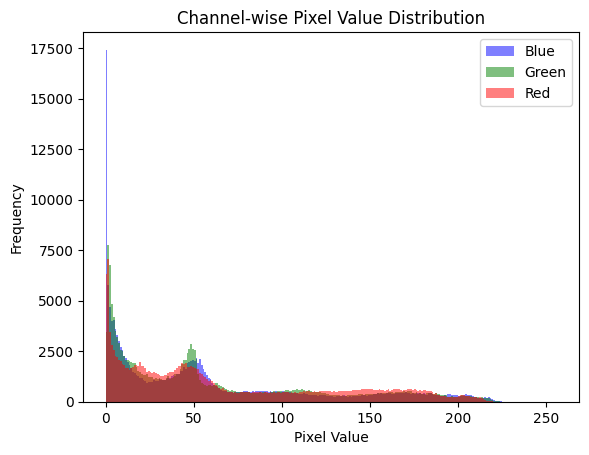

Image Path: c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\train_set\cat.3300.jpg
Image Size: (228, 249, 3)
Pixel Value Range: 2 - 223


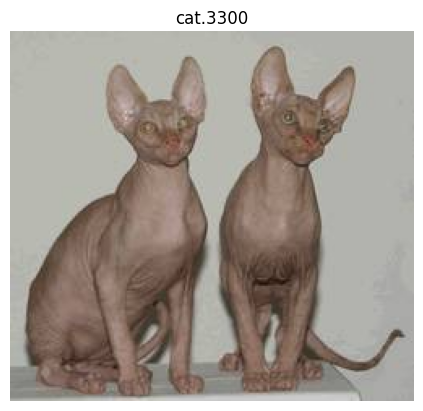

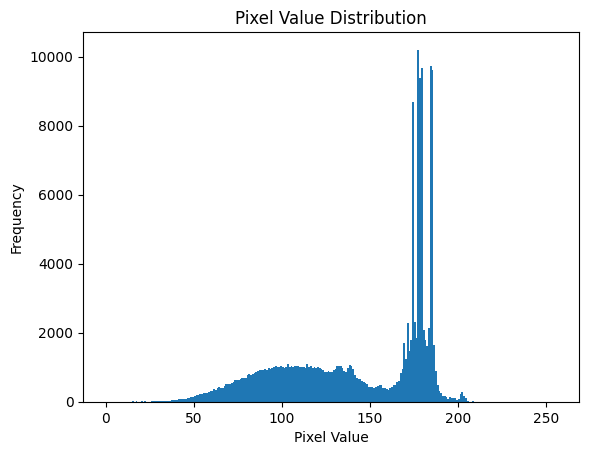

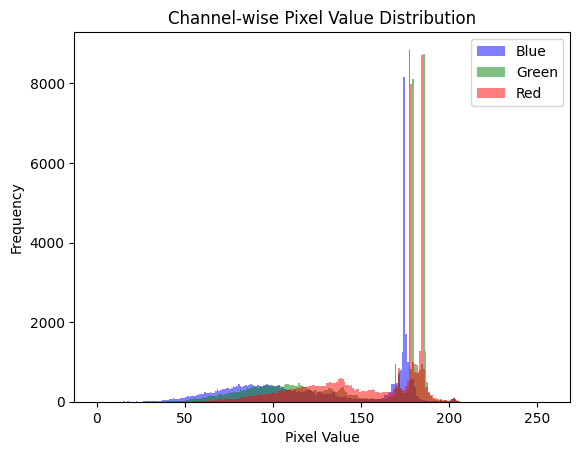

Image Path: c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\train_set\dog.2253.jpg
Image Size: (374, 500, 3)
Pixel Value Range: 0 - 255


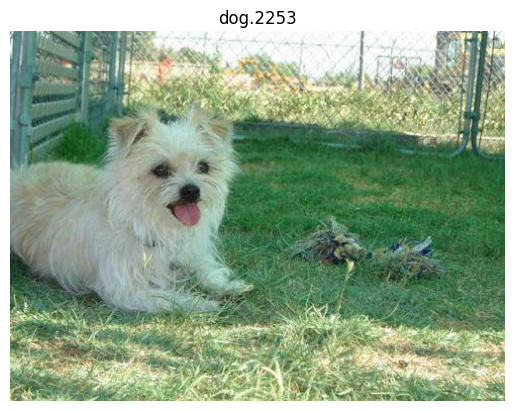

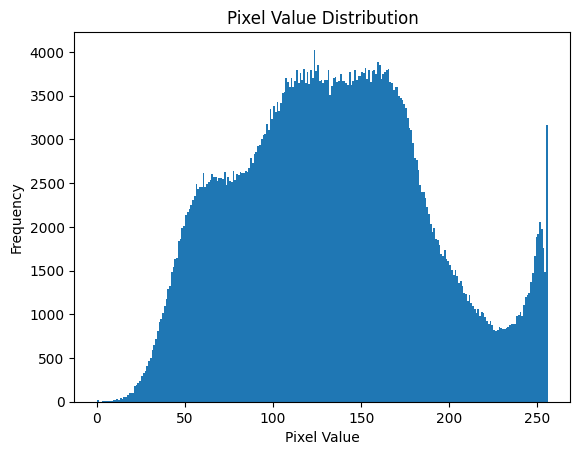

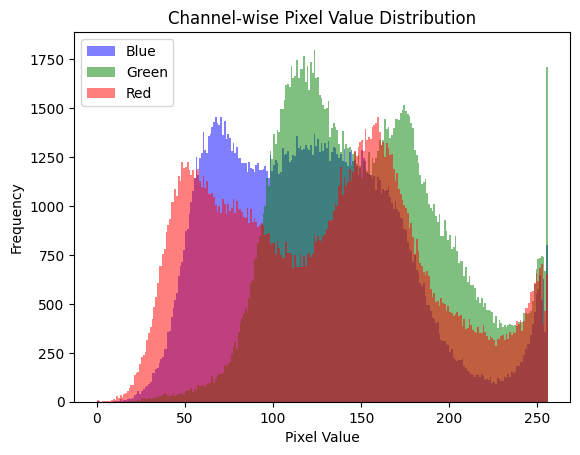

Image Path: c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\train_set\cat.1895.jpg
Image Size: (335, 406, 3)
Pixel Value Range: 0 - 255


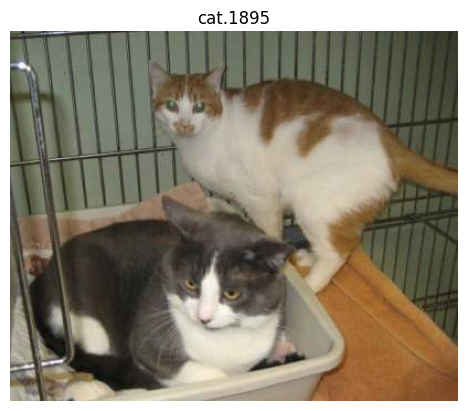

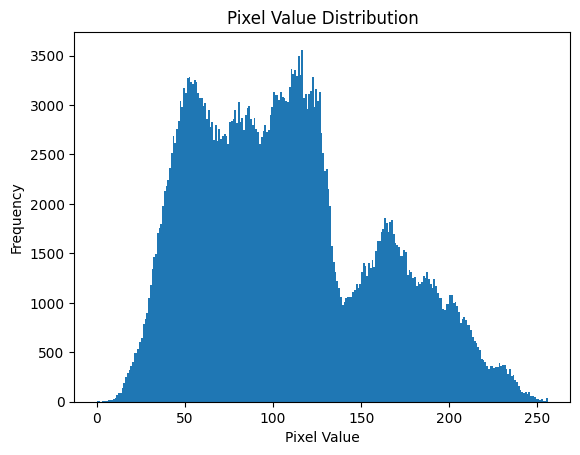

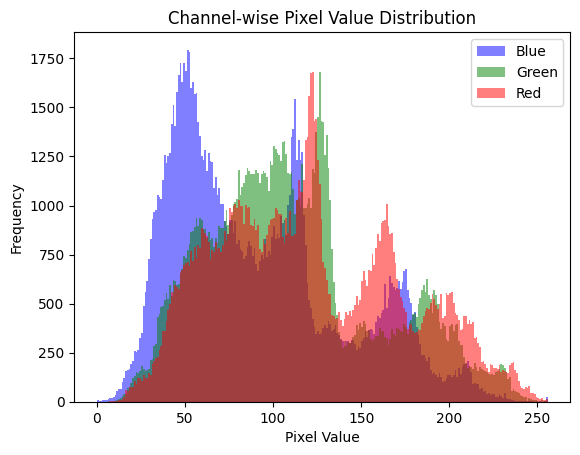

Image Path: c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\train_set\dog.573.jpg
Image Size: (268, 359, 3)
Pixel Value Range: 0 - 255


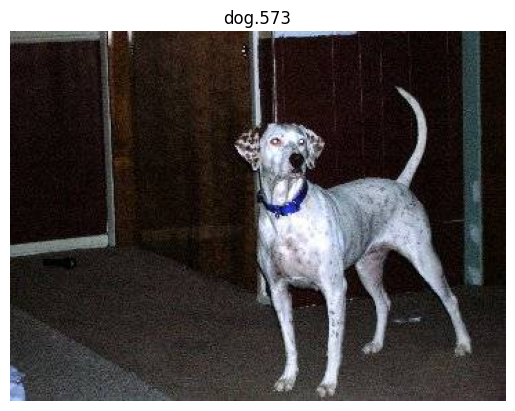

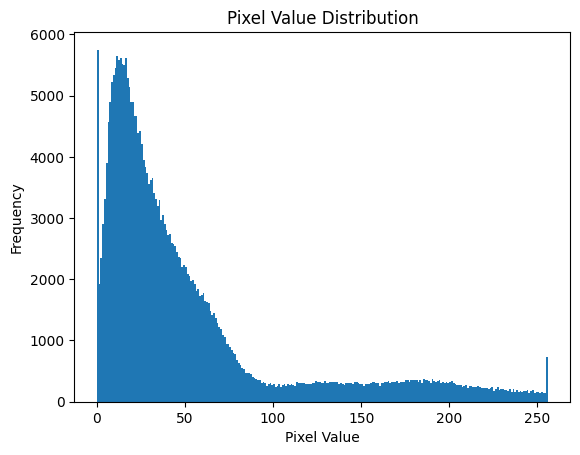

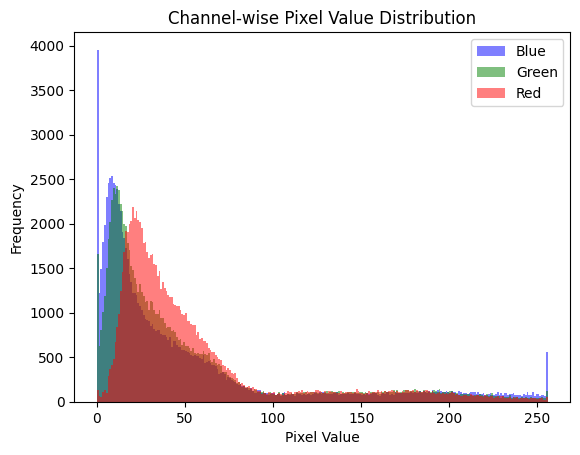

Image Path: c:\Users\gdnjr5233_YOLO\Desktop\cats-dogs\test_set\cat.4653.jpg
Image Size: (375, 499, 3)
Pixel Value Range: 0 - 255


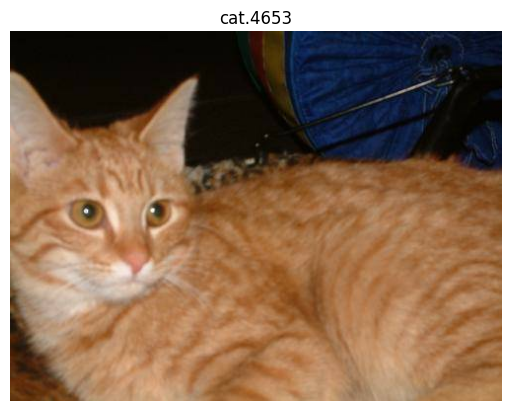

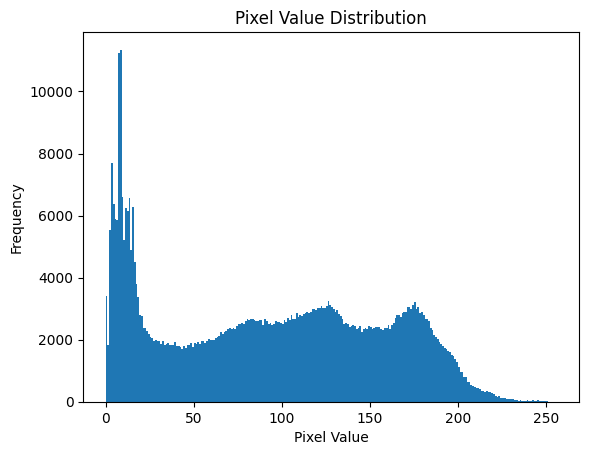

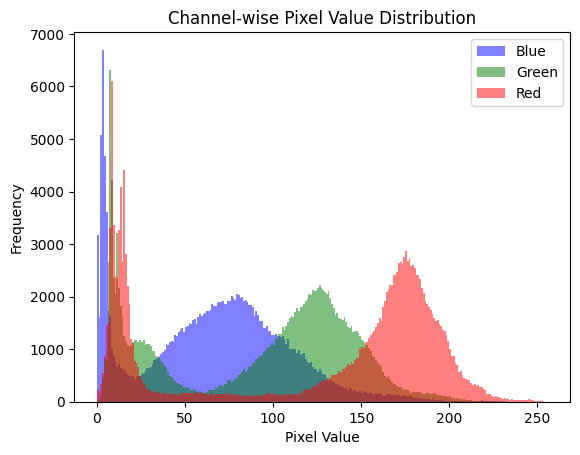

In [ ]:
# 图像路径
image_path = df['file_path']

# 从图片列表中随机选择10张图片
selected_images = random.sample(image_path.tolist(), 10)

# 循环遍历选中的图片文件路径，并显示图像基本信息
for image_file in selected_images:
    # 读取图像
    img = cv2.imread(image_file)

    # 获取图像名称（不包含文件格式）
    image_name = os.path.splitext(os.path.basename(image_file))[0]

    # 显示图像基本信息
    print(f"Image Path: {image_file}")
    print("Image Size:", img.shape)
    print("Pixel Value Range:", img.min(), "-", img.max())

    # 显示图像
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f'{image_name}')
    plt.axis('off')
    plt.show()

    # 显示像素值分布图
    plt.hist(img.ravel(), bins=256, range=[0,256])
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Pixel Value Distribution')
    plt.show()

    # 拆分通道
    b, g, r = cv2.split(img)

    # 显示通道直方图
    plt.hist(b.ravel(), bins=256, color='blue', range=[0,256], alpha=0.5)
    plt.hist(g.ravel(), bins=256, color='green', range=[0,256], alpha=0.5)
    plt.hist(r.ravel(), bins=256, color='red', range=[0,256], alpha=0.5)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.title('Channel-wise Pixel Value Distribution')
    plt.legend(['Blue', 'Green', 'Red'])
    plt.show()

## **Возможные применения этих данных в контексте машинного обучения**

Данные изображений кошек и собак имеют много потенциальных применений в контексте машинного обучения, включая:

1) **Классификация изображений:** Использование набора данных изображений кошек и собак позволяет обучить модель классификации изображений, которая автоматически определяет, изображен ли на фотографии кот или собака. Это полезно, например, для разработки интеллектуальных фотоальбомов и поисковых систем изображений.

2) **Обнаружение объектов:** На основе данных изображений кошек и собак можно обучить модель обнаружения объектов, которая распознает местоположение кошек или собак на изображении. Это находит применение в областях видеонаблюдения, автономного вождения и других.

3) **Перенос обучения:** Изображения кошек и собак могут быть использованы для переноса обучения, то есть обучения модели на одной задаче и применения ее к другой схожей задаче. Например, модель, обученная на этих данных, может хорошо справляться с задачей классификации других видов животных.
